In [17]:
# plt.rcParams['figure.figsize'] = (6 5)
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap']='gray'
# plt.rcParams['grid.color'] = '0.95'

plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

%config InlineBackend.figure_format = 'retina'

In [18]:
import numpy as np
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
import matplotlib.pyplot as plt

In [19]:
def A1d(eta, a, b, J):
    h = (b-a) / (float)(J+1.)
    e = np.ones(J, dtype=np.float64)
    
    arr = np.array([-e / h**2, (eta + 2. / h**2)*e, -e / h**2])
    print(h, h**2, eta)
    arr2 = np.array([-1, 0, 1])
    A = sparse.spdiags(arr, arr2, J, J)
    return A

def Solve1d(f, eta, a, b, gg, gd):
    # construct finite difference operator
    A = A1d(eta, a, b, J)
    h = (b-a)/(J+1.)
    
    ff = f.copy()
        
    ff[0] = f[0] + gg / h**2
    ff[-1] = f[-1] + gd / h**2
    
    u = linalg.inv(A) * ff;
    u = np.insert(u, [0], gg)
    u = np.append(u, gd)

    return u

In [ ]:
# draw contour in image
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(img1, cmap='gray')
ax.contour(mask, vmin=0, vmax=1, levels=[0.5], linewidth=2, colors='r', origin='image')
ax.axis('off')

ax.get_xaxis().set_major_locator(mpl.ticker.NullLocator())
ax.get_yaxis().set_major_locator(mpl.ticker.NullLocator())

fig.subplots_adjust(bottom=0)

fig.savefig(fname, transparent=True, bbox_inches='tight', pad_inches=0)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 20 but corresponding boolean dimension is 22
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:171: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


0.047619047619047616 0.0022675736961451243 0.0


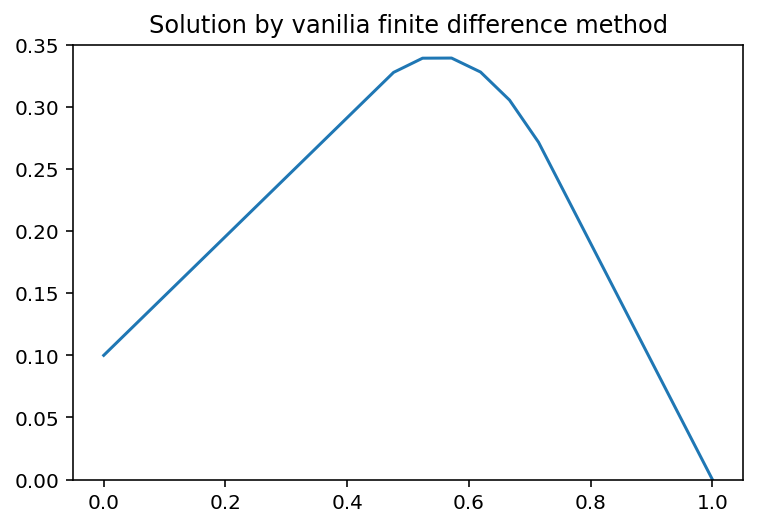

In [20]:
eta=0.; J=20; # J number of interior mesh points

x = np.linspace(0,1,J+2)
f = np.zeros(J);
mask = np.logical_and(x>0.4, x<0.7)
f[mask] = 5.;

gg = 0.1; gd = 0.;
## Vanila finite difference method
u = Solve1d(f,eta,0, 1,gg,gd)
plt.plot(x, u)
plt.ylim([0,0.35])
plt.title('Solution by vanilia finite difference method')
plt.show()

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:171: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


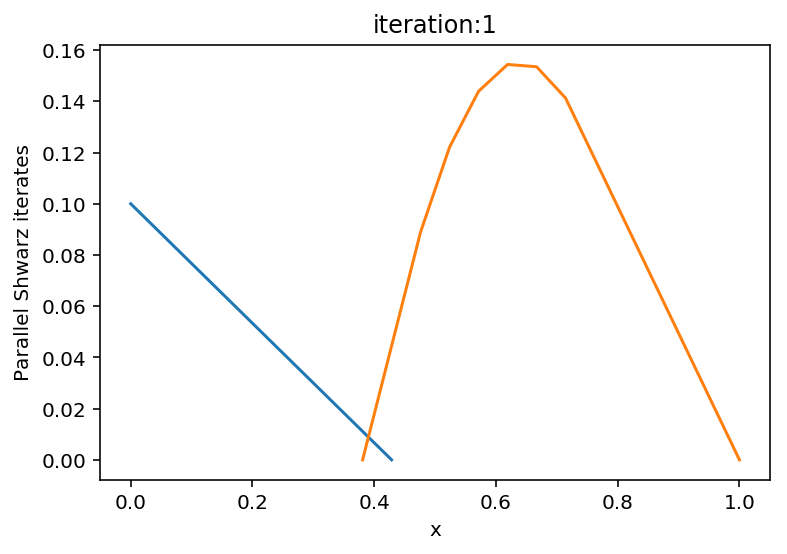

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


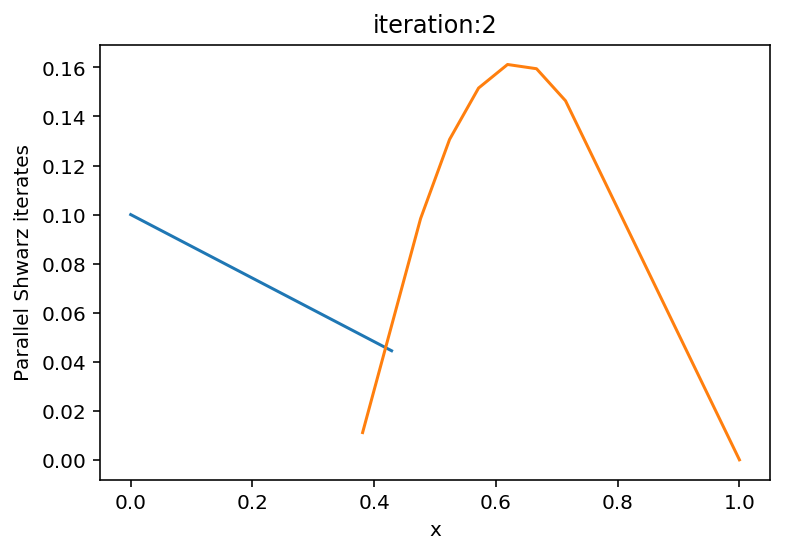

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


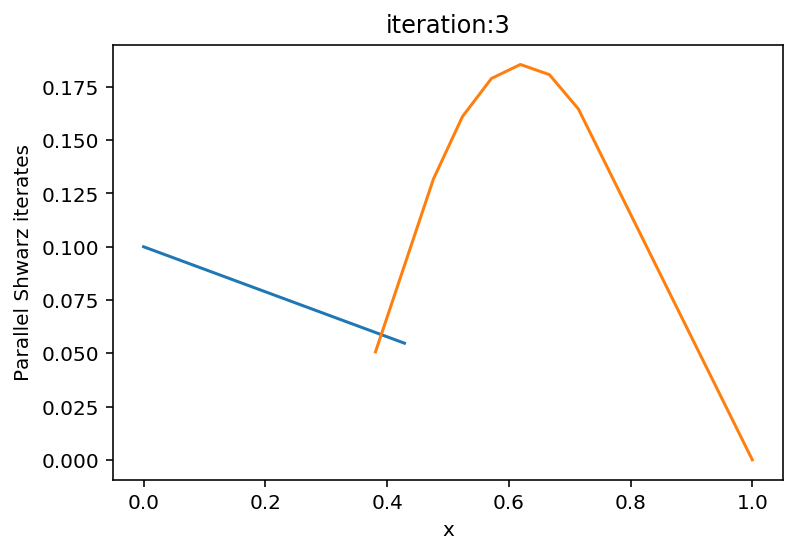

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


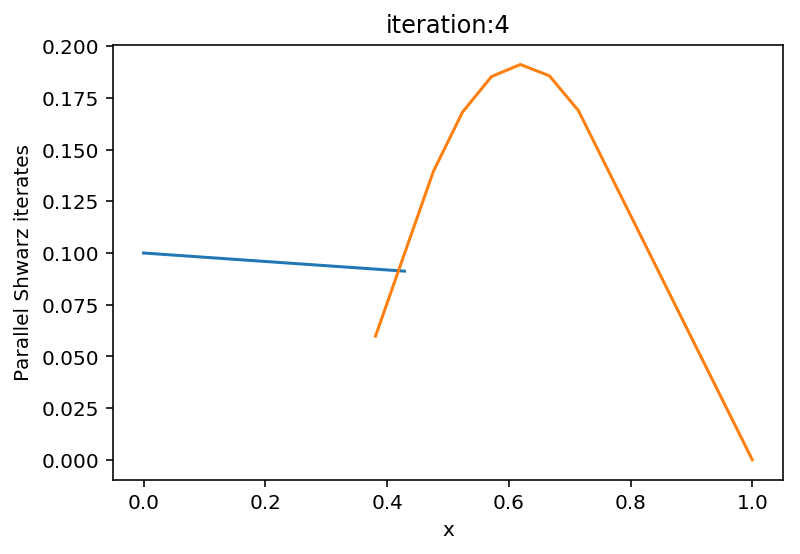

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


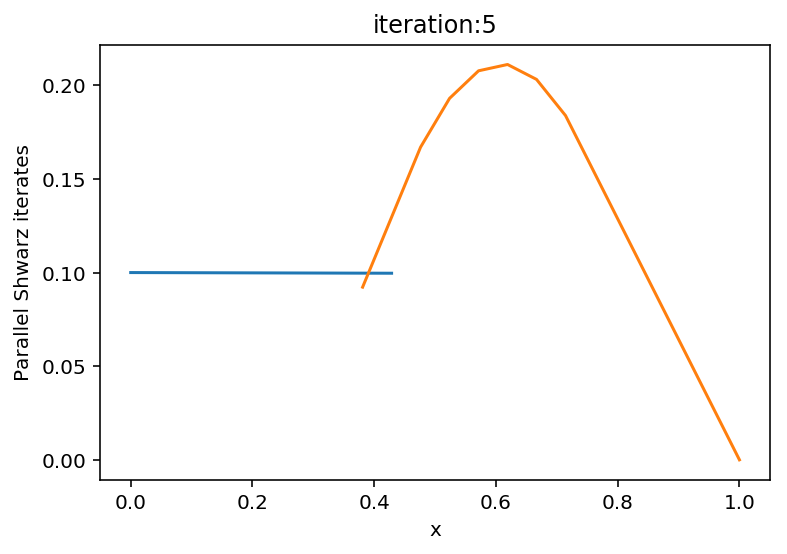

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


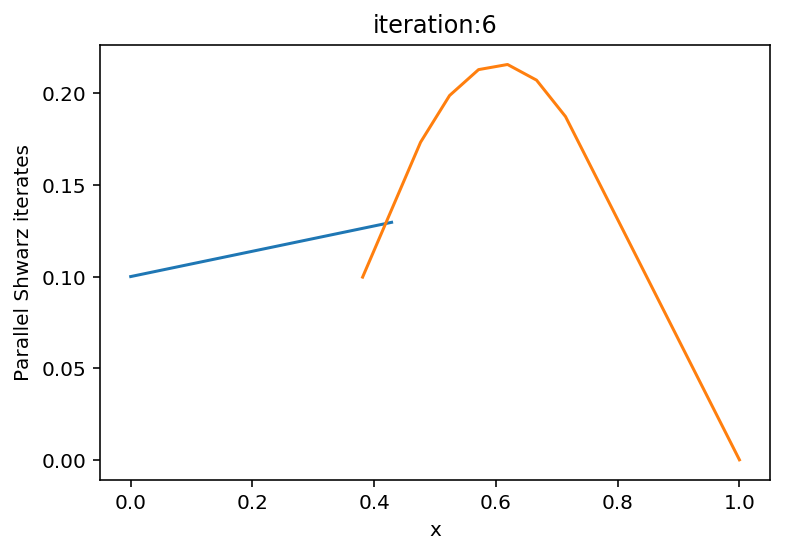

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


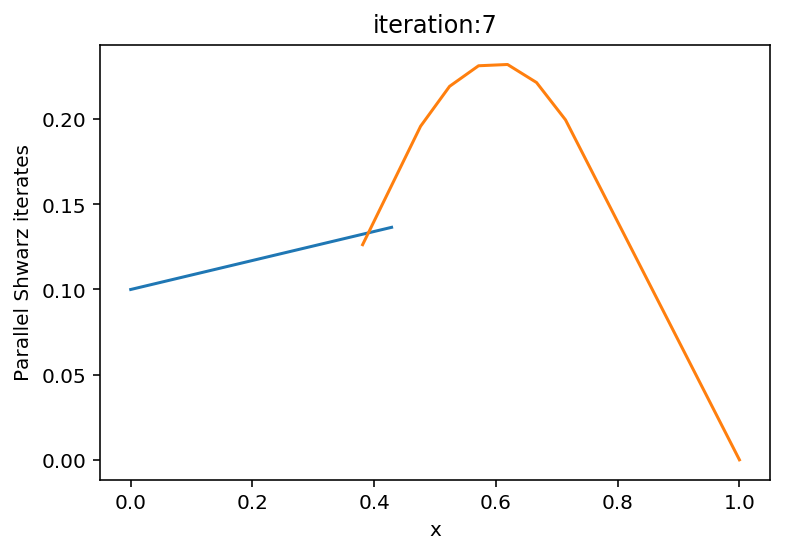

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


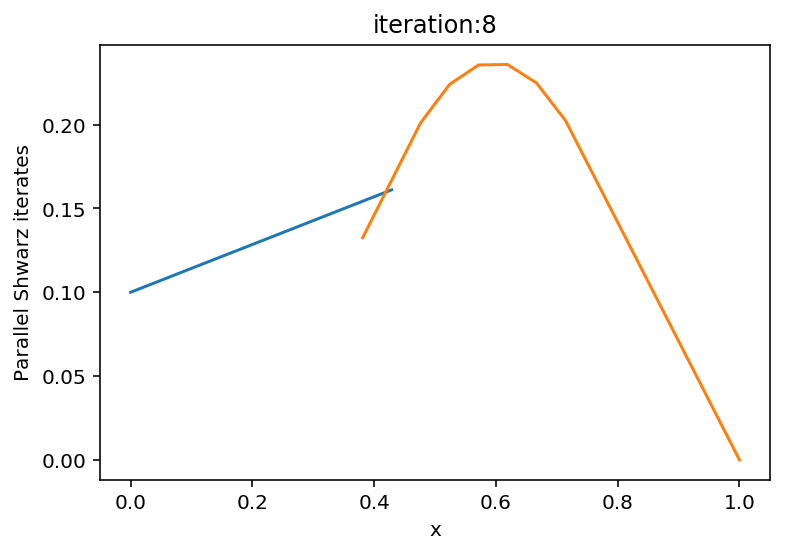

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


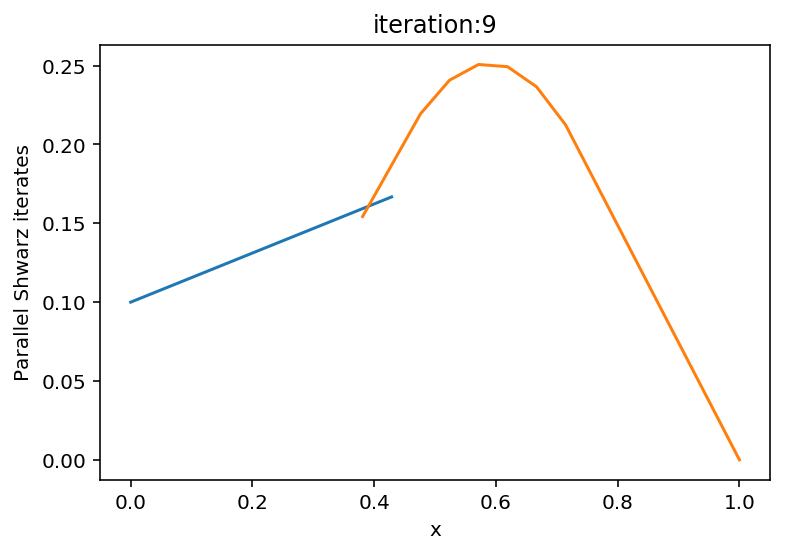

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


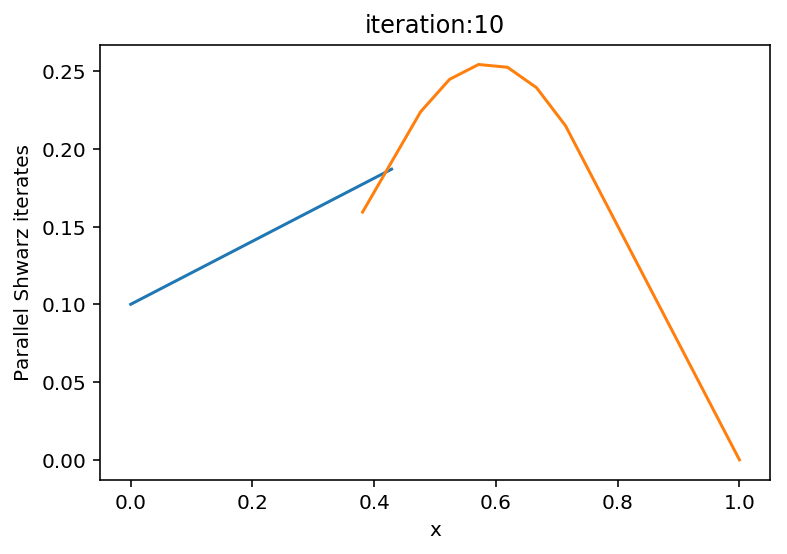

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


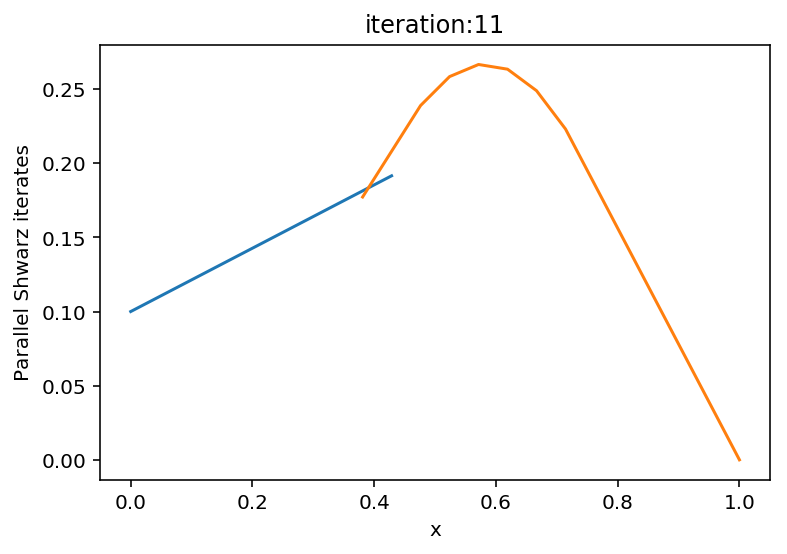

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


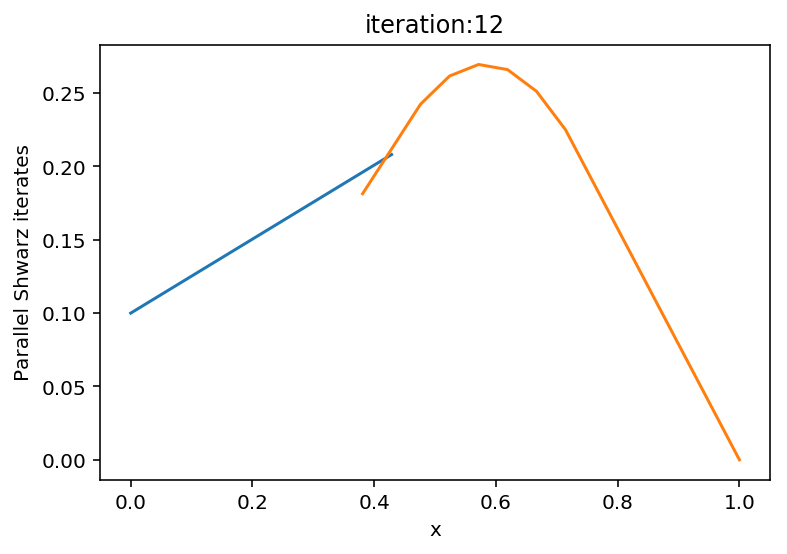

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


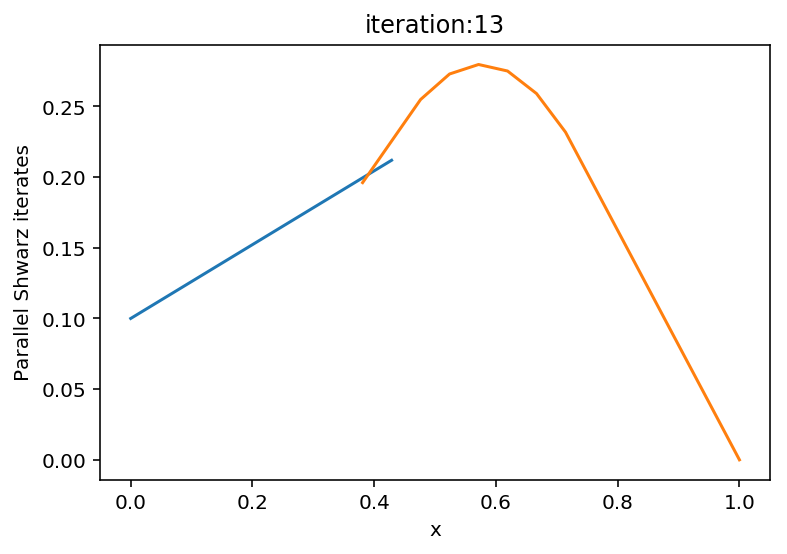

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


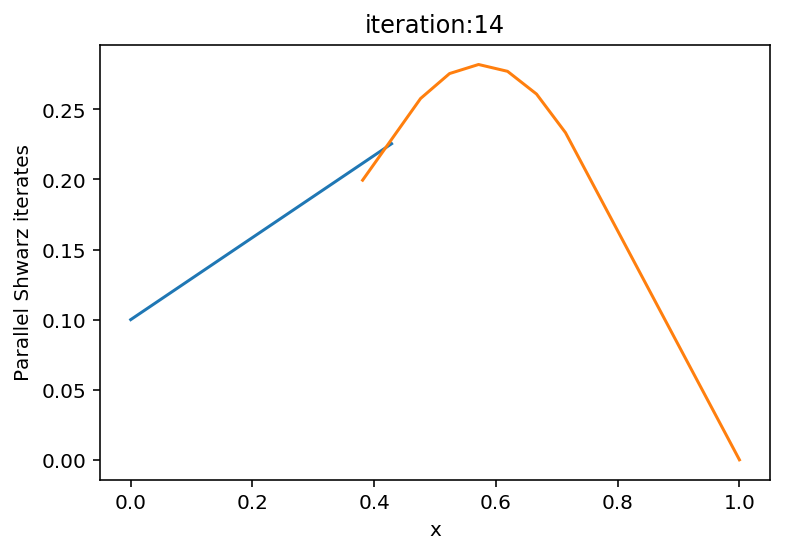

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


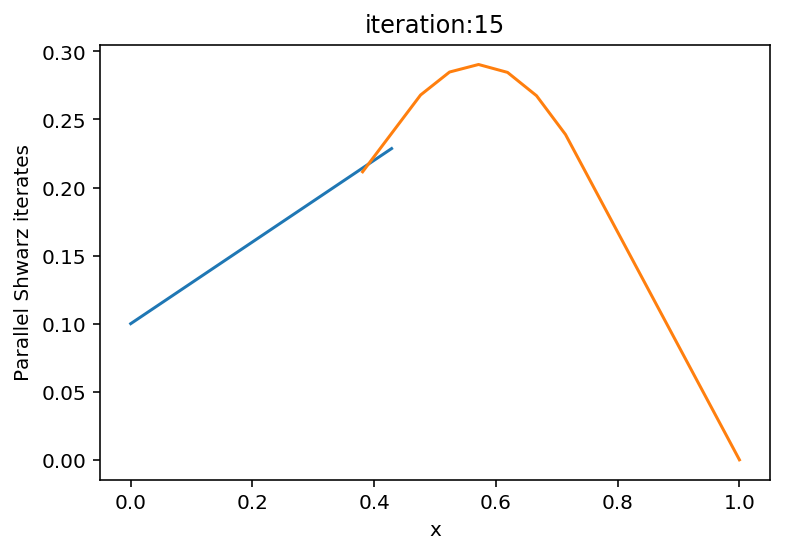

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


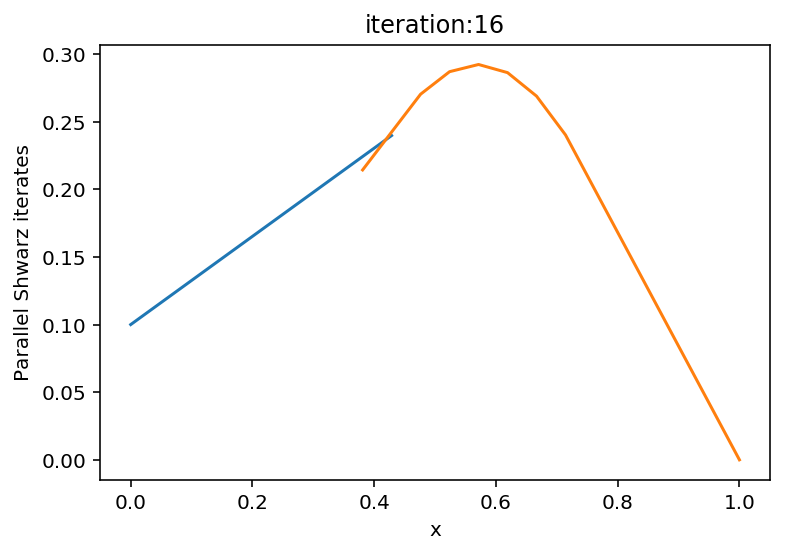

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


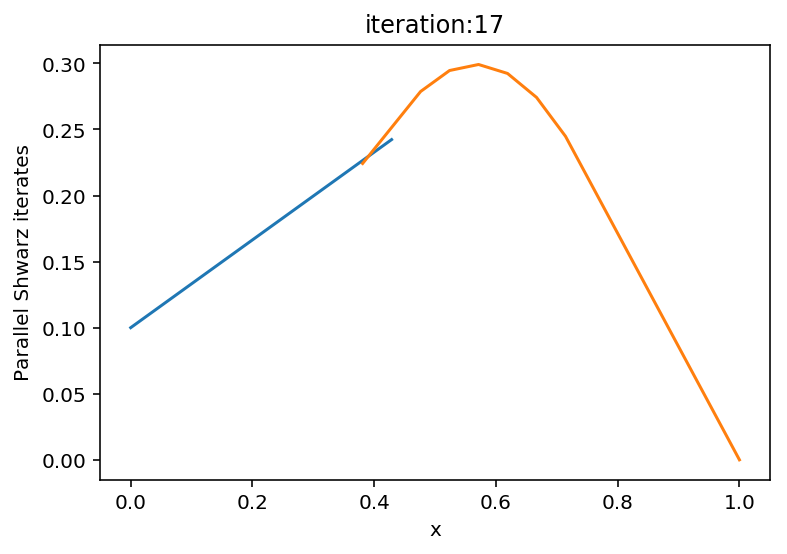

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


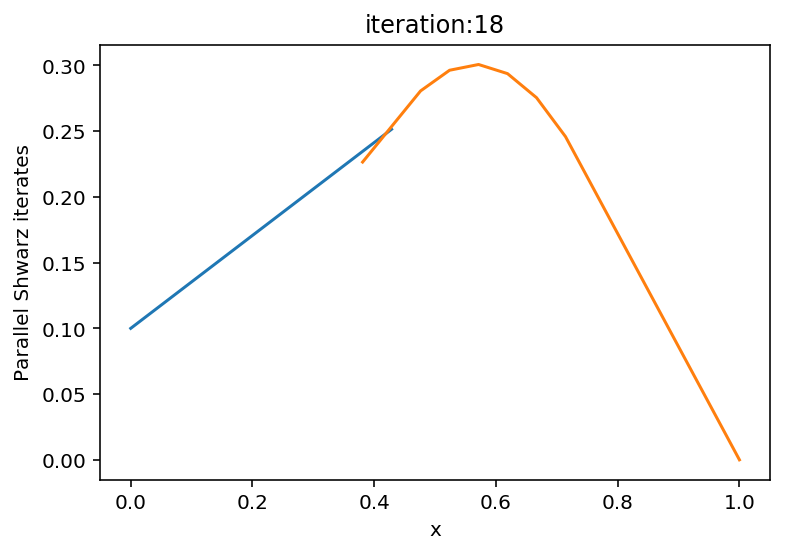

0.047619047619 0.00226757369615 0.0
0.047619047619 0.00226757369615 0.0


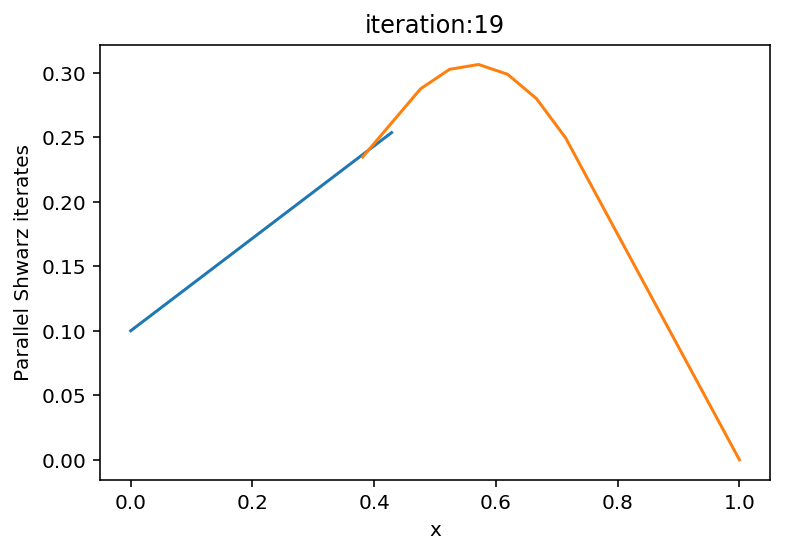

In [28]:
## Schwarz method
a=8; d=1;
f1 = f[:a+d-1];
f2 = f[a:J];
u1 = np.zeros(a+d+1)
u1[0] = gg

u2 = np.zeros(J-a+2)
u2[-1] = gd

x1 = x[:a+d+1]
x2 = x[a:]

for i in range(1,20,1):
    u1 = Solve1d(f1,eta,x1[0],x1[-1],gg,u2[d])
    u2 = Solve1d(f2,eta,x2[0],x2[-1],u1[-1-d],gd)
    plt.plot(x1, u1, '-', x2, u2, '-')
    plt.xlabel('x')
    plt.ylabel('Alternating Schwarz iterates')
    plt.ylim([0,0.35])
    plt.title('iteration:' + str(i))
    plt.savefig(('figure/%03d.png' % (i)), transparent=True, bbox_inches='tight', pad_inches=0)
    plt.show()

#     u1old=u1;
#     u1=Solve1d(f1,eta,x1[0],x1[-1],gg,u2[d]);
#     u2=Solve1d(f2,eta,x2[0],x2[-1],u1old[-1-d],gd);
#     plt.plot(x1,u1,'-',x2,u2,'-'); plt.xlabel('x');
#     plt.ylabel('Parallel Shwarz iterates');
#     plt.title('iteration:' + str(i))
#     plt.savefig(('figure/%03d.png' % (i)), transparent=True, bbox_inches='tight', pad_inches=0)
#     plt.show()